## Tic-Tac-Toe Agent
​By Wasim Khan




In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
!pip install gym

In [2]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy_policy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)  
    
    z = np.random.random() 
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   
    else:
        possible_actions = [i for i in env.action_space(state)[0]]        
        action = possible_actions[np.random.choice(range(len(possible_actions)))]    
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_state_action_Qvalues = [('x-x-x-x-x-x-x-x-x',(3,7)), ('x-x-9-x-x-6-x-x-x',(7,7)),
                       ('x-1-6-x-x-x-x-x-x',(0,9)),('x-1-x-x-x-x-2-x-x',(2,3))]    #Select some 4 Q-values
    for q_val in sample_state_action_Qvalues:
        state = q_val[0]
        action = q_val[1]
        States_track[state][action] = [] 

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
initialise_tracking_states()

In [12]:
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(3, 7): []},
             'x-x-9-x-x-6-x-x-x': {(7, 7): []},
             'x-1-6-x-x-x-x-x-x': {(0, 9): []},
             'x-1-x-x-x-x-2-x-x': {(2, 3): []}})

#### Define hyperparameters  ---write your code here

In [13]:
EPISODES = 5000000            # total no. of episodes
LR = 0.01                     # learning rate
GAMMA = 0.9                   # discount factor

max_epsilon = 1.0             # Greed: 100%
min_epsilon = 0.001           # Min_Greed: 0.1%
decay_rate = 0.000002         # epsilon decay rate
threshold = 2500              # no. of episodes after which states_tracked will be saved
policy_threshold = 10000      # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [14]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe() # call the environment
    curr_state = env.state    
    terminal = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while terminal != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy_policy(curr_state, episode)   # applying epislon-greedy policy method
        next_state, reward, terminal = env.step(curr_state, curr_action) # getting next_state, reward, terminal flag
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        # Updating rules
        if terminal != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
        print(episode)     ## Tracking episode at step increment of threshold value

    if ((episode+1)% policy_threshold) == 0:  # Every 10000 episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict') 
                    

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

2499
4999
7499
9999
12499
14999
17499
19999
22499
24999
27499
29999
32499
34999
37499
39999
42499
44999
47499
49999
52499
54999
57499
59999
62499
64999
67499
69999
72499
74999
77499
79999
82499
84999
87499
89999
92499
94999
97499
99999
102499
104999
107499
109999
112499
114999
117499
119999
122499
124999
127499
129999
132499
134999
137499
139999
142499
144999
147499
149999
152499
154999
157499
159999
162499
164999
167499
169999
172499
174999
177499
179999
182499
184999
187499
189999
192499
194999
197499
199999
202499
204999
207499
209999
212499
214999
217499
219999
222499
224999
227499
229999
232499
234999
237499
239999
242499
244999
247499
249999
252499
254999
257499
259999
262499
264999
267499
269999
272499
274999
277499
279999
282499
284999
287499
289999
292499
294999
297499
299999
302499
304999
307499
309999
312499
314999
317499
319999
322499
324999
327499
329999
332499
334999
337499
339999
342499
344999
347499
349999
352499
354999
357499
359999
362499
364999
367499
369999
372499
3

2702499
2704999
2707499
2709999
2712499
2714999
2717499
2719999
2722499
2724999
2727499
2729999
2732499
2734999
2737499
2739999
2742499
2744999
2747499
2749999
2752499
2754999
2757499
2759999
2762499
2764999
2767499
2769999
2772499
2774999
2777499
2779999
2782499
2784999
2787499
2789999
2792499
2794999
2797499
2799999
2802499
2804999
2807499
2809999
2812499
2814999
2817499
2819999
2822499
2824999
2827499
2829999
2832499
2834999
2837499
2839999
2842499
2844999
2847499
2849999
2852499
2854999
2857499
2859999
2862499
2864999
2867499
2869999
2872499
2874999
2877499
2879999
2882499
2884999
2887499
2889999
2892499
2894999
2897499
2899999
2902499
2904999
2907499
2909999
2912499
2914999
2917499
2919999
2922499
2924999
2927499
2929999
2932499
2934999
2937499
2939999
2942499
2944999
2947499
2949999
2952499
2954999
2957499
2959999
2962499
2964999
2967499
2969999
2972499
2974999
2977499
2979999
2982499
2984999
2987499
2989999
2992499
2994999
2997499
2999999
3002499
3004999
3007499
3009999
3012499


#### Check the Q-dictionary

In [15]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.3068316895973218,
              (0, 3): -1.3113129813534,
              (0, 5): -1.3125087473390968,
              (0, 7): -1.2305850029144656,
              (0, 9): -1.3103166896784266,
              (1, 1): -1.3125435786020114,
              (1, 3): -1.3130696063917993,
              (1, 5): -1.3071473525394581,
              (1, 7): -0.9036736338839062,
              (1, 9): -1.3040076841640755,
              (2, 1): -1.3150711570885565,
              (2, 3): 5.2911157936906035,
              (2, 5): -1.3101944509725372,
              (2, 7): -1.3161945861874904,
              (2, 9): -1.302638121171232,
              (3, 1): -1.309125990900978,
              (3, 3): -1.315807624943204,
              (3, 5): -1.3025889189210085,
              (3, 7): -1.2977854964075146,
              (3, 9): -1.282336331923158,
              (4, 1): -1.3118581474033328,
              (4, 3): -1.3061454576464528,
              (4, 5): -

In [16]:
len(Q_dict)

1855429

In [17]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
random_state_key= np.random.choice(list(Q_dict.keys()))
random_state_key

'6-x-x-x-x-5-7-x-8'

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [18]:
# Write the code for plotting the graphs for state-action pairs tracked


<function matplotlib.pyplot.show(close=None, block=None)>

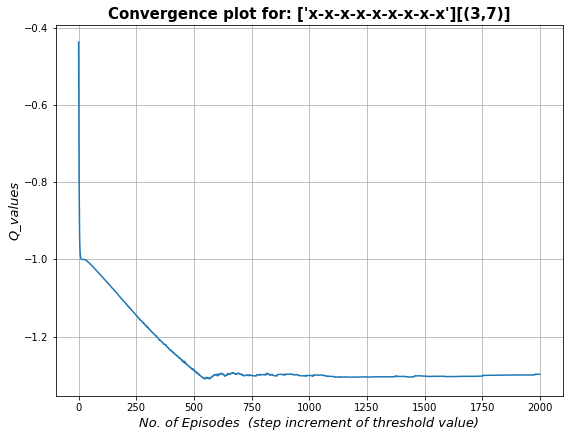

In [19]:
plt.figure(0, figsize=(20,15))

#Graph 1: Convergence Plot for state-action pair: ['x-x-x-x-x-x-x-x-x'][(3,7)]
x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(3,7)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(3,7)]))
plt.title("Convergence plot for: ['x-x-x-x-x-x-x-x-x'][(3,7)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

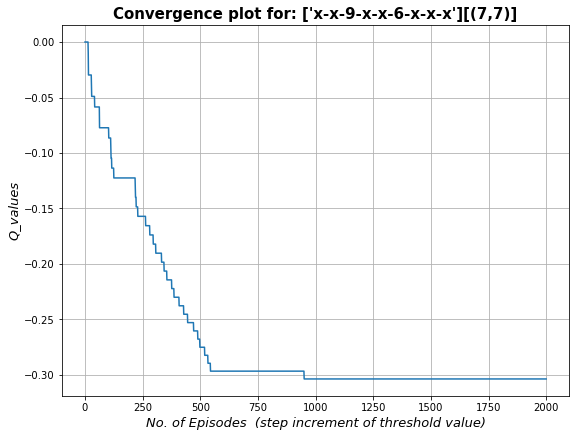

In [20]:
#Graph 2: Convergence Plot for state-action pair: ['x-x-9-x-x-6-x-x-x'][(7,7)]
plt.figure(0, figsize=(20,15))
x_axis = np.asarray(range(0, len(States_track['x-x-9-x-x-6-x-x-x'][(7,7)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-9-x-x-6-x-x-x'][(7,7)]))
plt.title("Convergence plot for: ['x-x-9-x-x-6-x-x-x'][(7,7)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

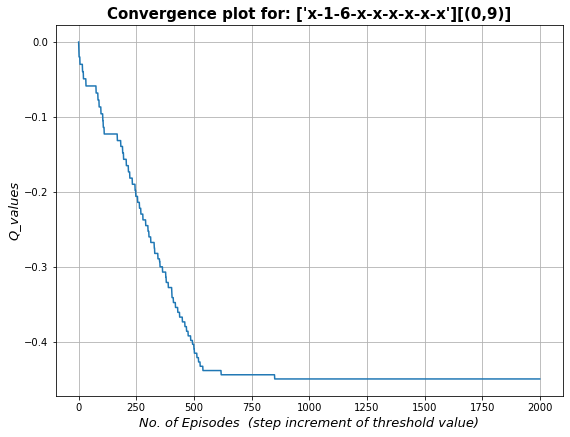

In [21]:
#Graph 3: Convergence Plot for state-action pair: ['x-1-6-x-x-x-x-x-x'][(0,9)]
plt.figure(0, figsize=(20,15))
x_axis = np.asarray(range(0, len(States_track['x-1-6-x-x-x-x-x-x'][(0,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-1-6-x-x-x-x-x-x'][(0,9)]))
plt.title("Convergence plot for: ['x-1-6-x-x-x-x-x-x'][(0,9)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

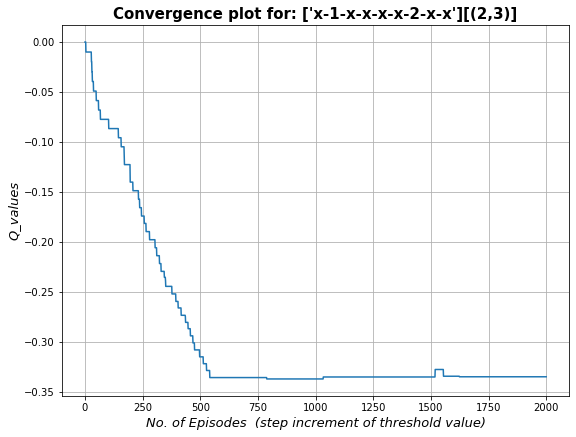

In [22]:
#Graph 4: Convergence Plot for state-action pair: ['x-1-x-x-x-x-2-x-x'][(2,3)]
plt.figure(0, figsize=(20,15))
x_axis = np.asarray(range(0, len(States_track['x-1-x-x-x-x-2-x-x'][(2,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-1-x-x-x-x-2-x-x'][(2,3)]))
plt.title("Convergence plot for: ['x-1-x-x-x-x-2-x-x'][(2,3)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

### Epsilon - decay check

In [23]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

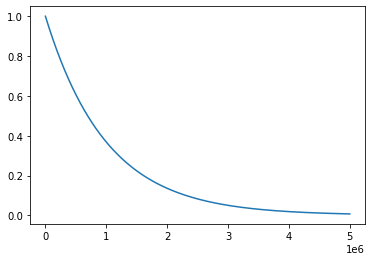

In [24]:
plt.plot(time, epsilon)
plt.show()